# <center>Recurrent Neural Network</center>

# <center>COSC 4337</center>


# <center>Dr. Rizk</center>

# <center> Dosbol Aliev</center>

# <center> MyUH: 1867424 </center>

## About

In this homework we will create a RNN from scratch in Python and use it to train a
model on reddit data. All the preprocessing will be done for you, and your main
task will be to implement the main parts of the RNN.
Be sure to download the starter code files. You’re welcome to transfer the code to a
jupyter notebook if you’d rather code in there.


Note: Don’t worry if your code doesn't work 100% or if you get poor results when
training. There are tons of implementations of these models from scratch online,
but what we care most about is your effort and understanding, so leave comments
documenting things where possible and the TA will grade you based on your
understanding of RNN and if you’re on the right track.

## Vanishing Gradient


Please discuss in detail the vanishing gradient problem. For example, <br>
● What is the vanishing gradient problem?<br>
● When does it happen?<br>
● How can we get around/resolve it?<br>
● Give an example<br>

In [13]:
from PIL import Image

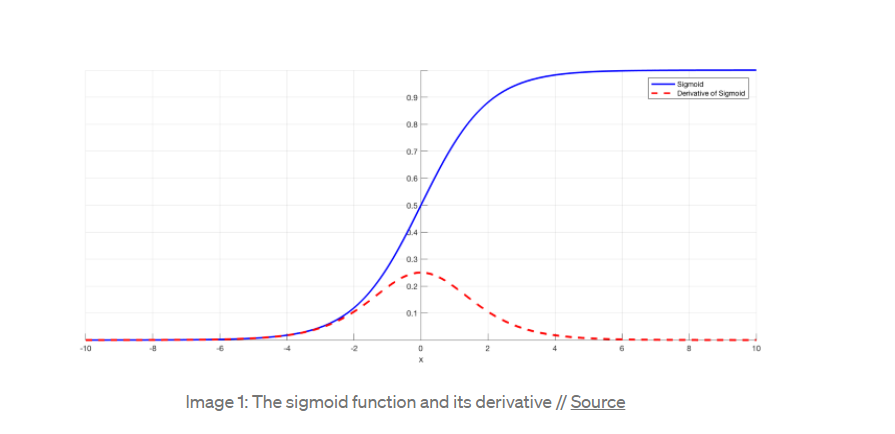

In [15]:
pic1= Image.open("Image 1.PNG")
pic1

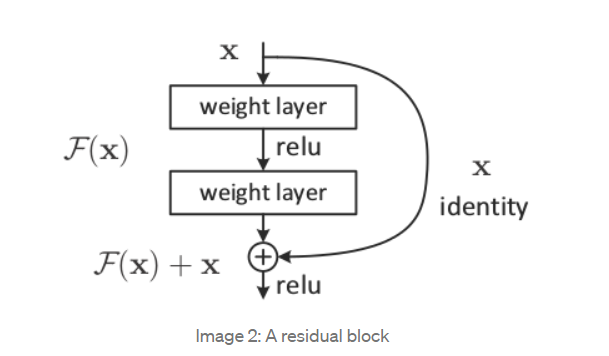

In [16]:
pic2= Image.open("Image 2.PNG")
pic2

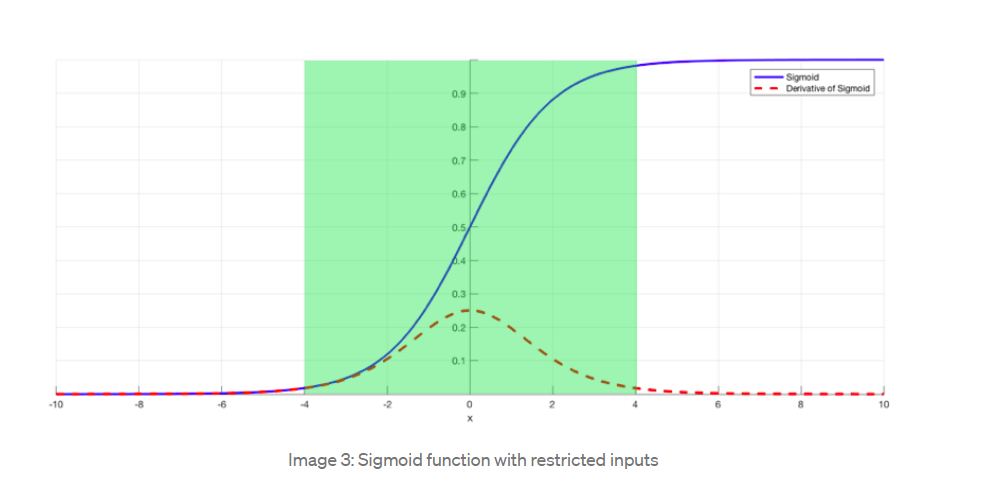

In [17]:
pic3= Image.open("Image 3.PNG")
pic3

1. In neural networks, the gradients of the loss function approach zero as additional layers with specific activation functions are added, making the network challenging to train.
<br>
2. For instance, the sigmoid function condenses the enormous input region between 0 and 1 into a small input area. Because the derivative diminishes, the output of the sigmoid function will change relatively little when the input varies dramatically. It depicted the sigmoid function and its derivative as an example in Image 1. Be aware that as |x| increases, the derivative gets closer to 0 as the sigmoid function's inputs expand or contract.
<br>
3. Using other activation functions, such as ReLU, which doesn't result in a small derivative, is the simplest approach. Another option is residual networks, which offer residual connections directly to prior tiers. The residual connection, as shown in Image 2, immediately adds the block's starting value, x, to its ending value (F(x)+x). Because this residual link bypasses the activation processes that "squash" the derivatives, the block's overall derivative is higher. Batch normalization layers can also help to fix the problem. As previously mentioned, the issue develops when a vast input space is transferred to a tiny one, which makes the derivatives vanish. This is best seen in Image 1 when |x| is large. By simply normalizing the input so that |x| doesn't approach the sigmoid function's outside edges, batch normalization reduces this issue. It normalizes the input, as seen in Image 3 so that most of it falls in the green area where the derivative isn't too small.


### SOURCE: https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

## RNN

#### What type of data is best suited for an RNN/LSTM and why?

#### LSTM(Long short-term memory) networks solve the long-term reliance or vanishing gradients problem of RNNs. Gradient vanishing is the loss of data in a neural network as connections occur more frequently over time. LSTM combats gradient vanishing by disregarding irrelevant data and information in the network, to put it simply.
<br>

#### In comparison to RNN, LSTM has the advantage of handling information in memory for a longer period of time.



## About RNN

The architecture of RNN can be as the following figure

## About RNN...

You can find that the parameters (W, U, V) are shared in different time steps. And
the output in each time step can be softmax. So you can use cross entropy loss as
an error function and use some optimizing method (e.g. gradient descent) to
calculate the optimized parameters (W, U, V).
Let recap the equations of our RNN:

## About RNN...


We also defined our loss, or error, to be the cross entropy loss, given by:

## About RNN...

Here y_t is the correct word at time step t, and y^_t is our prediction. We typically
treat the full sequence (sentence) as one training example, so the total error is just
the sum of the errors at each time step (word).

## About RNN...

Remember that our goal is to calculate the gradients of the error with respect to our
parameters U, V and W and then learn good parameters using optimizing method
(Here we’ll use Stochastic Gradient Descent). Just like we sum up the errors, we
also sum up the gradients at each time step for one training example:
That is we should calculate dEt/dW, dEt/dU and dEt/dV, then sum up all time steps.

## About RNN...

It is simple to calculate dEt/dV, because it only depends on the values at the current
time step. But the story is different for dEt/dW and dEt/dU. Note that s_3 =
tanh(Ux_3 + Ws_2) depend on s_2, which depends on W, U and s_1, and so on. So
if we take the derivative with respect to W we can't treat s_2 as a constant! We
need to apply the chain rule again. You can have a view from the following figure.

## About RNN...


We can use a computation graph to represent E1 as an example and calculate
dE1/dW, dE1/dU is the same idea.

## About RNN...

Note that this is exactly the same as the standard backpropagation algorithm that we use in deep
Feedforward Neural Networks. The key difference is that we sum up the gradients for W at each
time step. In a traditional NN we don’t share parameters across layers, so we don’t need to sum
anything. Backprop through time (BPTT) is just a fancy name for standard backpropagation on an
unrolled RNN.
To simplify the computation graph to make it efficient, we can integrate some small operation units
to a big operation unit. You can have a look the following figure. Note that the operation unit
should also implement the forward function and backward function

## Implementation (gates)

Given the following RNNLayer (see next slide, layer.py), your job is to
implementation all operation unit.

In [11]:
from activation import Tanh
from gate import AddGate, MultiplyGate


class RNNLayer:
    def forward(self, x, prev_s, U, W, V):
        self.mulu = mulGate.forward(U, x)
        self.mulw = mulGate.forward(W, prev_s)
        self.add = addGate.forward(self.mulw, self.mulu)
        self.s = activation.forward(self.add)
        self.mulv = mulGate.forward(V, self.s)
        
    def backward(self, x, prev_s, U, W, V, diff_s, dmulv):
        self.forward(x, prev_s, U, W, V)
        dV, dsv = mulGate.backward(V, self.s, dmulv)
        ds = dsv + diff_s
        dadd = activation.backward(self.add, ds)
        dmulw, dmulu = addGate.backward(self.mulw, self.mulu, dadd)
        dW, dprev_s = mulGate.backward(W, prev_s, dmulw)
        dU, dx = mulGate.backward(U, x, dmulu)
        return (dprev_s, dU, dW, dV)

In [2]:

import warnings
warnings.filterwarnings("ignore")

## Implementation (gates)


In gate.py, finish implementing the multiple and add gate.

In [3]:
class MultiplyGate:
    def forward(self,W, x):
        return np.dot(W, x)
    def backward(self, W, x, dz):
        dW = np.asarray(np.dot(np.transpose(np.asmatrix(dz)), np.asmatrix(x)))
        dx = np.dot(np.transpose(W), dz)
        return dW, dx

class AddGate:
    def forward(self, x1, x2):
        return x1 + x2
    def backward(self, x1, x2, dz):
        dx1 = dz * np.ones_like(x1)
        dx2 = dz * np.ones_like(x2)
        return dx1, dx2

## Implementation (activation)

In activation.py, write the code for Tanh. Use Sigmoid as a reference. 

In [4]:
import numpy as np

class Sigmoid:
    def forward(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    def backward(self, x, top_diff):
        output = self.forward(x)
        return (1.0 - output) * output * top_diff

class Tanh:
    def forward(self, x):
        return np.tanh(x)
    def backward(self, x, top_diff):
        output = self.forward(x)
        return (1.0 - np.square(output)) * top_diff


## Implementation (activation)


Note, you’re given a softmax in output.py which you can use for a later part of this
homework. 

In [5]:
import numpy as np

class Softmax:
    def predict(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores)
    def loss(self, x, y):
        probs = self.predict(x)
        return -np.log(probs[y])
    def diff(self, x, y):
        probs = self.predict(x)
        probs[y] -= 1.0
        return probs

        

## Implementation

Now that we are able to calculate the gradients for our parameters we can use SGD
to train the model.

## Initialization

Initializing the parameters U, V and W is a bit tricky. We can’t just initialize them to
0’s because that would result in symmetric calculations in all our layers. We must
initialize them randomly. Because proper initialization seems to have an impact on
training results there has been lot of research in this area. It turns out that the best
initialization depends on the activation function (tanh in our case) and one
recommended approach is to initialize the weights randomly in the interval from
 -1/sqrt(n), 1/sqrt(n)
 where n is the number of incoming connections from the previous layer.

## Initialization

In rnn.py, write the code to initialize U, W, and V. word_dim is the size of our
vocabulary, and hidden_dim is the size of our hidden layer (we can pick it). Don’t
worry about the bptt_truncate parameter for now.

In [6]:
from datetime import datetime
import numpy as np
import sys
from layer import RNNLayer
from output import Softmax


class Model:
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        self.U = np.random.uniform(-np.sqrt(1. / word_dim), np.sqrt(1. / word_dim), (hidden_dim, word_dim))
        self.W = np.random.uniform(-np.sqrt(1. / hidden_dim), np.sqrt(1. / hidden_dim), (hidden_dim, hidden_dim))
        self.V = np.random.uniform(-np.sqrt(1. / hidden_dim), np.sqrt(1. / hidden_dim), (word_dim, hidden_dim))

    '''
        forward propagation (predicting word probabilities)
        x is one single data, and a batch of data
        for example x = [0, 179, 341, 416], then its y = [179, 341, 416, 1]
    '''
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)
        layers = []
        prev_s = np.zeros(self.hidden_dim)
        # For each time step...
        for t in range(T):
            layer = RNNLayer()
            input = np.zeros(self.word_dim)
            input[x[t]] = 1
            layer.forward(input, prev_s, self.U, self.W, self.V)
            prev_s = layer.s
            layers.append(layer)
        return layers

    def predict(self, x):
        output = Softmax()
        layers = self.forward_propagation(x)
        return [np.argmax(output.predict(layer.mulv)) for layer in layers]

    def calculate_loss(self, x, y):
        assert len(x) == len(y)
        output = Softmax()
        layers = self.forward_propagation(x)
        loss = 0.0
        for i, layer in enumerate(layers):
            loss += output.loss(layer.mulv, y[i])
        return loss / float(len(y))

    def calculate_total_loss(self, X, Y):
        loss = 0.0
        for i in range(len(Y)):
            loss += self.calculate_loss(X[i], Y[i])
        return loss / float(len(Y))

    def bptt(self, x, y):
        assert len(x) == len(y)
        output = Softmax()
        layers = self.forward_propagation(x)
        dU = np.zeros(self.U.shape)
        dV = np.zeros(self.V.shape)
        dW = np.zeros(self.W.shape)

        T = len(layers)
        prev_s_t = np.zeros(self.hidden_dim)
        diff_s = np.zeros(self.hidden_dim)
        for t in range(0, T):
            dmulv = output.diff(layers[t].mulv, y[t])
            input = np.zeros(self.word_dim)
            input[x[t]] = 1
            dprev_s, dU_t, dW_t, dV_t = layers[t].backward(input, prev_s_t, self.U, self.W, self.V, diff_s, dmulv)
            prev_s_t = layers[t].s
            dmulv = np.zeros(self.word_dim)
            for i in range(t-1, max(-1, t-self.bptt_truncate-1), -1):
                input = np.zeros(self.word_dim)
                input[x[i]] = 1
                prev_s_i = np.zeros(self.hidden_dim) if i == 0 else layers[i-1].s
                dprev_s, dU_i, dW_i, dV_i = layers[i].backward(input, prev_s_i, self.U, self.W, self.V, dprev_s, dmulv)
                dU_t += dU_i
                dW_t += dW_i
            dV += dV_t
            dU += dU_t
            dW += dW_t
        return (dU, dW, dV)

    def sgd_step(self, x, y, learning_rate):
        dU, dW, dV = self.bptt(x, y)
        self.U -= learning_rate * dU
        self.V -= learning_rate * dV
        self.W -= learning_rate * dW

    def train(self, X, Y, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        num_examples_seen = 0
        losses = []
        for epoch in range(nepoch):
            if (epoch % evaluate_loss_after == 0):
                loss = self.calculate_total_loss(X, Y)
                losses.append((num_examples_seen, loss))
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if len(losses) > 1 and losses[-1][1] > losses[-2][1]:
                    learning_rate = learning_rate * 0.5
                    print("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            # For each training example...
            for i in range(len(Y)):
                self.sgd_step(X[i], Y[i], learning_rate)
                num_examples_seen += 1
        return losses

## Forward Propagation

Next, let’s implement the forward propagation (predicting word probabilities)
defined by our previous information. Finish filling in the code from rnn.py

You’ll also have a predict function already implemented for you for future use. 

## Calculating the Loss

To train our network we need a way to measure the errors it makes. We call this the
loss function L, and our goal is find the parameters U, V and W that minimize the
loss function for our training data. A common choice for the loss function is the
cross-entropy loss. Fill in the necessary code in rnn.py to calculate the loss.

## Backpropagation Through Time (BPTT)

Implement BPTT algorithm in rnn.py. It takes as input a training example (x, y) and
returns the gradients dL/dW, dL/dU and dL/dV.

## SGD Implementation


Now that we are able to calculate the gradients for our parameters we can
implement SGD. This is implemented for you already in sgd_step and train (see
rnn.py). Here, we’re annealing the learning rate by 0.5 if we find the loss increases
in this epoch.

## Evaluation

Try running rnnlm.py, which will train the model on our reddit data and see if your
losses decrease. 

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZOS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import numpy as np

from preprocessing import getSentenceData
from rnn import Model

word_dim = 8000
hidden_dim = 100
X_train, y_train = getSentenceData('data.csv', word_dim)

np.random.seed(10)
rnn = Model(word_dim, hidden_dim)

losses = rnn.train(X_train[:100], y_train[:100], learning_rate=0.005, nepoch=10, evaluate_loss_after=1)

Reading CSV file...
Parsed 79062 sentences.
Found 63006 unique words tokens.
Using vocabulary size 8000.
The least frequent word in our vocabulary is 'appointments' and appeared 10 times.

Example sentence: 'SENTENCE_START i joined a new league this year and they have different scoring rules than i'm used to. SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'i', 'joined', 'a', 'new', 'league', 'this', 'year', 'and', 'they', 'have', 'different', 'scoring', 'rules', 'than', 'i', "'m", 'used', 'to', '.', 'SENTENCE_END']'

X_train shape: (78489,)
y_train shape: (78489,)
x:
SENTENCE_START what are n't you understanding about this ? !
[0, 52, 28, 17, 10, 858, 55, 26, 35, 70]

y:
what are n't you understanding about this ? ! SENTENCE_END
[52, 28, 17, 10, 858, 55, 26, 35, 70, 1]
2022-11-11 20:56:54: Loss after num_examples_seen=0 epoch=0: 8.987482
2022-11-11 20:58:55: Loss after num_examples_seen=100 epoch=1: 8.973095
2022-11-11 21:01:05: Loss after num_examples_seen=2